# importing all the needed libraries

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
import pandas as pd

Train = pd.read_csv("Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [3]:
Test = pd.read_csv("Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("Test_Outpatientdata-1542969243754.csv")

In [4]:
Train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [5]:
Test.columns

Index(['Provider'], dtype='object')

In [6]:
Train_Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [7]:
len(Train_Beneficiary.columns)

25

In [8]:
len(Test_Beneficiary.columns)

25

In [9]:
Train_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [10]:
len(Train_Outpatient.columns)

27

In [11]:
len(Test_Outpatient.columns)

27

In [12]:
Train_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

AdmissionDt: It contains the date on which the patient was admitted into hospital in yyyy-mm-dd format.
DischargeDt: It contains the date on which the patient was discharged from the hospital in yyyy-mm-dd format.
DiagnosisGroupCode: It contains group code for the diagnosis done on the patient.

In [13]:
len(Train_Inpatient.columns)

30

In [14]:
len(Test_Inpatient.columns)

30

In [15]:
 # functions for adding percentage on top of bar plot with hue and without hue
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

# Analyzing Provider Data

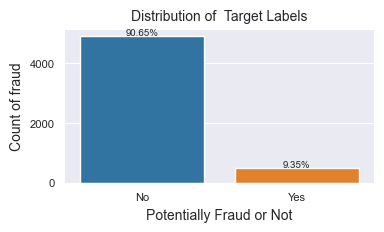

In [16]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(4,2))
sns.set_style('darkgrid')
ax = sns.countplot(x='PotentialFraud',data=Train)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('Distribution of  Target Labels', fontsize=10)
plt.xlabel('Potentially Fraud or Not', size = 10)
plt.ylabel('Count of fraud', size = 10)
percentage_without_hue(ax, Train['PotentialFraud'], 0,20,7)

# Analyzing Beneficiary Data

In [17]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [18]:
Train_Beneficiary['ChronicCond_Alzheimer'].unique()

array([1, 2], dtype=int64)

In [19]:
Train_Beneficiary['RenalDiseaseIndicator'].unique()

array(['0', 'Y'], dtype=object)

In [20]:
#Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [21]:
# convert all these columns datatypes to numeric
Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


In [22]:
# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good

Train_Beneficiary['Patient_Risk_Score'] = Train_Beneficiary['ChronicCond_Alzheimer'] + Train_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiary['ChronicCond_KidneyDisease'] + Train_Beneficiary['ChronicCond_Cancer'] +\
                                        Train_Beneficiary['ChronicCond_ObstrPulmonary'] + Train_Beneficiary['ChronicCond_Depression'] +\
                                    Train_Beneficiary['ChronicCond_Diabetes'] + Train_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiary['ChronicCond_Osteoporasis'] + Train_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiary['ChronicCond_stroke'] + Train_Beneficiary['RenalDiseaseIndicator'] 

# calculate patient risk score by summing up all risk scores
Test_Beneficiary['Patient_Risk_Score'] = Test_Beneficiary['ChronicCond_Alzheimer'] + Test_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Test_Beneficiary['ChronicCond_KidneyDisease'] + Test_Beneficiary['ChronicCond_Cancer'] +\
                                        Test_Beneficiary['ChronicCond_ObstrPulmonary'] + Test_Beneficiary['ChronicCond_Depression'] +\
                                    Test_Beneficiary['ChronicCond_Diabetes'] + Test_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Test_Beneficiary['ChronicCond_Osteoporasis'] + Test_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Test_Beneficiary['ChronicCond_stroke'] + Test_Beneficiary['RenalDiseaseIndicator'] 
# 

In [23]:
Train_Beneficiary['Gender'].unique()

array([1, 2], dtype=int64)

In [24]:
# Replacing '2' with '0' for Gender Type
Train_Beneficiary = Train_Beneficiary.replace({'Gender': 2}, 0)

Test_Beneficiary = Test_Beneficiary.replace({'Gender': 2}, 0)

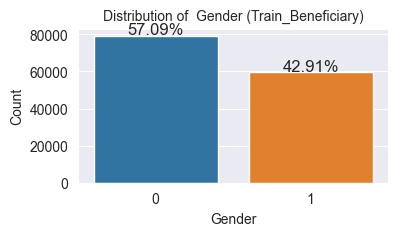

In [25]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(4,2))
ax = sns.countplot(x='Gender',data=Train_Beneficiary, order = Train_Beneficiary['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiary)', fontsize=10)
plt.xlabel('Gender', size = 10)
plt.ylabel('Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['Gender'], 0,800,12)

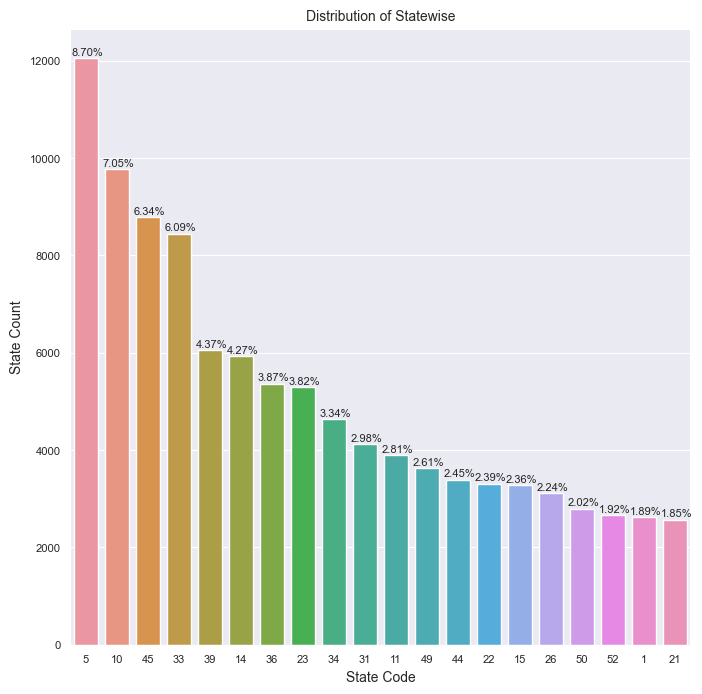

In [26]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='State',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['State'].value_counts().head(20).index)
plt.title('Distribution of Statewise', fontsize=10)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('State Code', size = 10)
plt.ylabel('State Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['State'], 0.05, 60,8)

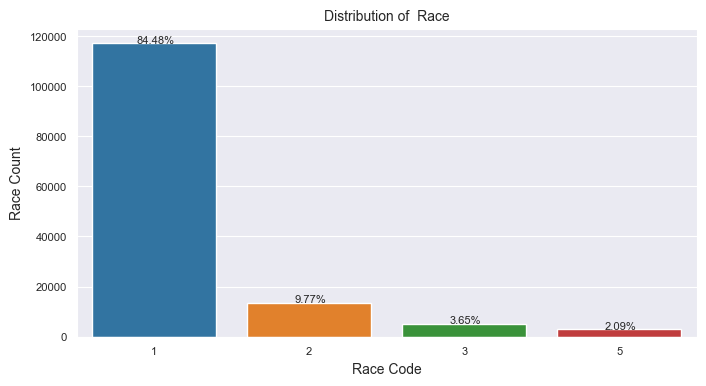

In [27]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Race',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Race'].value_counts().index)
plt.title('Distribution of  Race', fontsize=10)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('Race Code', size = 10)
plt.ylabel('Race Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 100,8)

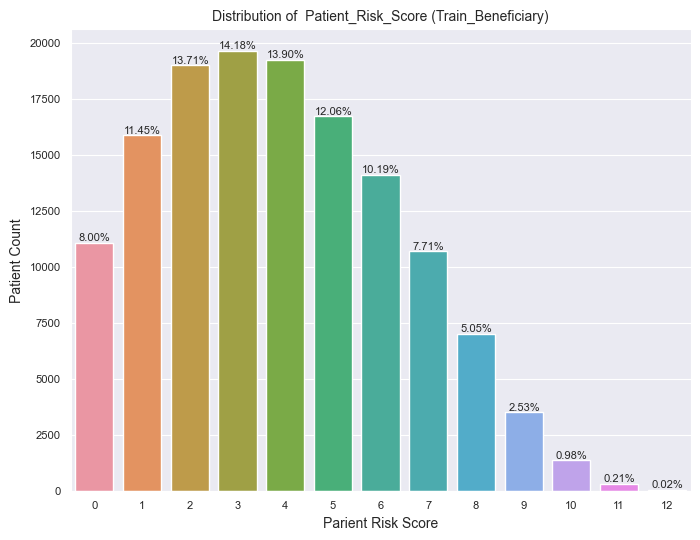

In [28]:
# Distribition of patient risk score
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Train_Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score (Train_Beneficiary)', fontsize=10)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('Parient Risk Score', size = 10)
plt.ylabel('Patient Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['Patient_Risk_Score'], 0.01, 100,8)

In [29]:
# Calculate total inpatient reimbursement amount for all the beneficiaries
Train_Beneficiary.IPAnnualReimbursementAmt.sum()


507162970

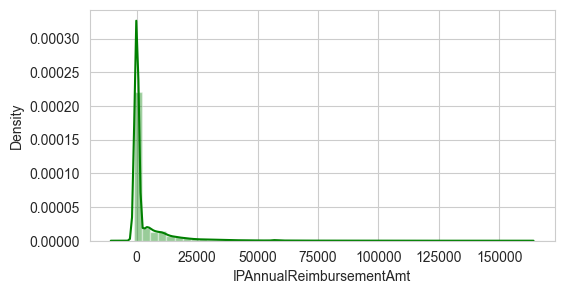

In [32]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(6, 3))
sns.distplot(Train_Beneficiary['IPAnnualReimbursementAmt'],  kde=True, color ='green', bins = 50)
plt.show()

In [35]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

25 , 0.0 || 50 , 0.0 || 75 , 2280.0 || 100 , 161470.0 || 

In [37]:
Train_Beneficiary.IPAnnualReimbursementAmt.min()

-8000

In [38]:
Train_Beneficiary.IPAnnualReimbursementAmt.max()

161470

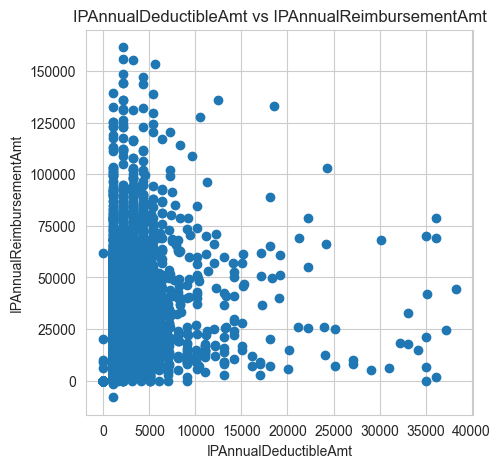

In [43]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(5, 5))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

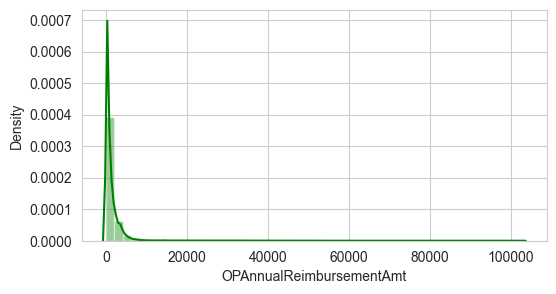

In [41]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(6, 3))
sns.distplot(Train_Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [44]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")

25 , 170.0 || 50 , 570.0 || 75 , 1500.0 || 100 , 102960.0 || 

In [45]:
# Convert Date of Birth and Date of Death from String to Datetime format
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%Y-%m-%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format = '%Y-%m-%d')

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format = '%Y-%m-%d')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],format = '%Y-%m-%d')

In [46]:
# Get the birth month and Birth year for DOB and DOD
Train_Beneficiary['Birth_Year'] = Train_Beneficiary['DOB'].dt.year
Train_Beneficiary['Birth_Month'] = Train_Beneficiary['DOB'].dt.month

Test_Beneficiary['Birth_Year'] = Test_Beneficiary['DOB'].dt.year
Test_Beneficiary['Birth_Month'] = Test_Beneficiary['DOB'].dt.month

In [47]:
#Calculate patient's age based on DOD, if DOD is not available calculate age based on the maximum date available in the data
Train_Beneficiary['Patient_Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

Test_Beneficiary['Patient_Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365)
Test_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Test_Beneficiary['DOB']).dt.days)/365),inplace=True)

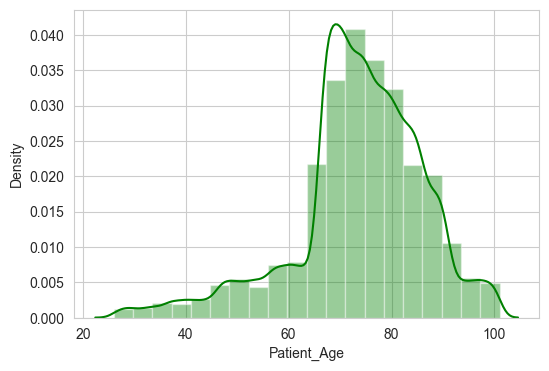

In [48]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.distplot(Train_Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.show()

In [49]:
# Set value=1 if the patient is dead i.e DOD value is not null
Train_Beneficiary['isDead'] = 0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(), 'isDead'] = 1
Test_Beneficiary['isDead'] = 0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(), 'isDead'] = 1

# Analyzing Inpatient data

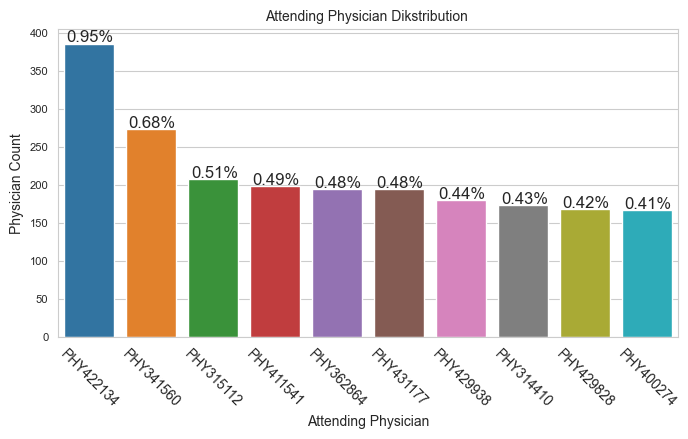

In [52]:
# Plot top 10 Attending Physician in terms of number of patients treated
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['AttendingPhysician'].value_counts().iloc[:10].index)
plt.title('Attending Physician Dikstribution ', fontsize=10)
plt.xlabel('Attending Physician', size = 10)
plt.ylabel('Physician Count', size = 10)
plt.yticks(size=8)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['AttendingPhysician'], 0.02, 2, 12)

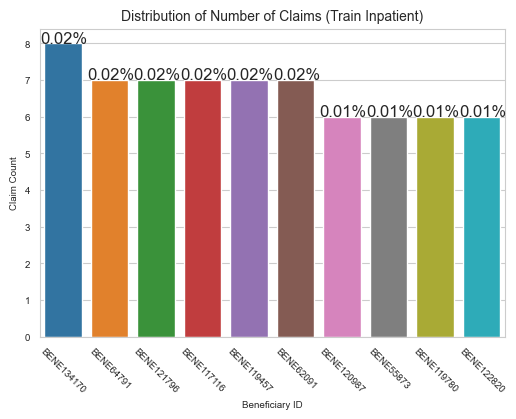

In [57]:
# Distribution of Number of Claims
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='BeneID',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['BeneID'].value_counts().head(10).index)
plt.title('Distribution of Number of Claims ', fontsize=10)
plt.xlabel('Beneficiary ID', size = 7)
plt.ylabel('Claim Count', size = 7)
plt.xticks(rotation=-45)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, Train_Inpatient['BeneID'], 0.02, 0.01, 12)

In [58]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format = '%Y-%m-%d')

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format = '%Y-%m-%d')

In [60]:
#Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatient['Hospitalization_Duration'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatient['Claim_Period'] = ((Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days)+1

Test_Inpatient['Hospitalization_Duration'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1
Test_Inpatient['Claim_Period'] = ((Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days)+1


In [61]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
Train_Inpatient['ExtraClaimDays'] = np.where(Train_Inpatient['Claim_Period']>Train_Inpatient['Hospitalization_Duration'], Train_Inpatient['Claim_Period'] - Train_Inpatient['Hospitalization_Duration'], 0)
Test_Inpatient['ExtraClaimDays'] = np.where(Test_Inpatient['Claim_Period']>Test_Inpatient['Hospitalization_Duration'], Test_Inpatient['Claim_Period'] - Test_Inpatient['Hospitalization_Duration'], 0)


In [62]:
# Get the months and year of claim start and claim end
Train_Inpatient['ClaimStart_Year'] = Train_Inpatient['ClaimStartDt'].dt.year
Train_Inpatient['ClaimStart_Month'] = Train_Inpatient['ClaimStartDt'].dt.month
Test_Inpatient['ClaimStart_Year'] = Test_Inpatient['ClaimStartDt'].dt.year
Test_Inpatient['ClaimStart_Month'] = Test_Inpatient['ClaimStartDt'].dt.month

Train_Inpatient['ClaimEnd_Year'] = Train_Inpatient['ClaimEndDt'].dt.year
Train_Inpatient['ClaimEnd_Month'] = Train_Inpatient['ClaimEndDt'].dt.month
Test_Inpatient['ClaimEnd_Year'] = Test_Inpatient['ClaimEndDt'].dt.year
Test_Inpatient['ClaimEnd_Month'] = Test_Inpatient['ClaimEndDt'].dt.month
# Plot distribution of claim start 

In [63]:
# Get the month and year of Admission_Year and Admission_Month
Train_Inpatient['Admission_Year'] = Train_Inpatient['AdmissionDt'].dt.year
Train_Inpatient['Admission_Month'] = Train_Inpatient['AdmissionDt'].dt.month
Test_Inpatient['Admission_Year'] = Test_Inpatient['AdmissionDt'].dt.year
Test_Inpatient['Admission_Month'] = Test_Inpatient['AdmissionDt'].dt.month

Train_Inpatient['Discharge_Year'] = Train_Inpatient['DischargeDt'].dt.year
Train_Inpatient['Discharge_Month'] = Train_Inpatient['DischargeDt'].dt.month
Test_Inpatient['Discharge_Year'] = Test_Inpatient['DischargeDt'].dt.year
Test_Inpatient['Discharge_Month'] = Test_Inpatient['DischargeDt'].dt.month

In [64]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Train_Inpatient["ClmProcedureCode_1"], 
                                   Train_Inpatient["ClmProcedureCode_2"],
                                   Train_Inpatient["ClmProcedureCode_3"],
                                   Train_Inpatient["ClmProcedureCode_4"], 
                                   Train_Inpatient["ClmProcedureCode_5"], 
                                   Train_Inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

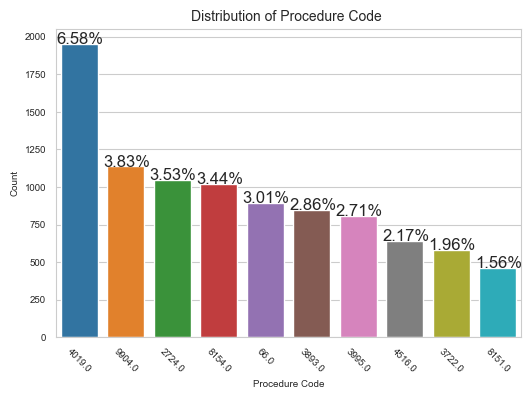

In [66]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(10).index)
plt.title('Distribution of Procedure Code ', fontsize=10)
plt.xlabel('Procedure Code', size = 7)
plt.ylabel('Count', size = 7)
plt.xticks(rotation=-45)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

In [67]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_Inpatient["ClmDiagnosisCode_1"], 
                                           Train_Inpatient["ClmDiagnosisCode_2"], 
                                           Train_Inpatient["ClmDiagnosisCode_3"], 
                                           Train_Inpatient["ClmDiagnosisCode_4"],
                                           Train_Inpatient["ClmDiagnosisCode_5"], 
                                           Train_Inpatient["ClmDiagnosisCode_6"],
                                           Train_Inpatient["ClmDiagnosisCode_7"],
                                           Train_Inpatient["ClmDiagnosisCode_8"],
                                           Train_Inpatient["ClmDiagnosisCode_9"],
                                           Train_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

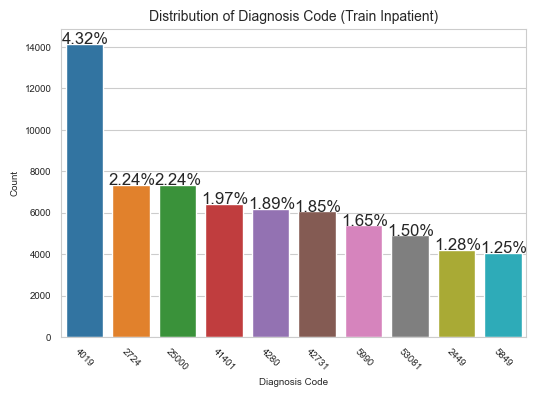

In [68]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(10).index)
plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=10)
plt.xlabel('Diagnosis Code', size = 7)
plt.ylabel('Count', size = 7)
plt.xticks(rotation=-45)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)

#    # Analyzing outpatient data

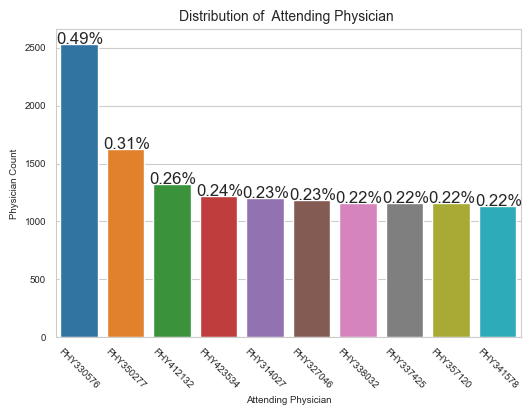

In [69]:
# Top 10 attending physician in terms of patient count
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['AttendingPhysician'].value_counts().iloc[:10].index)
plt.title('Distribution of  Attending Physician ', fontsize=10)
plt.xlabel('Attending Physician', size =7)
plt.ylabel('Physician Count', size = 7)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, Train_Outpatient['AttendingPhysician'], 0.02, 2, 12)

In [70]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

In [71]:
# Get the months and year of claim start and claim end
Train_Outpatient['ClaimStart_Year'] = Train_Outpatient['ClaimStartDt'].dt.year
Train_Outpatient['ClaimStart_Month'] = Train_Outpatient['ClaimStartDt'].dt.month
Test_Outpatient['ClaimStart_Year'] = Test_Outpatient['ClaimStartDt'].dt.year
Test_Outpatient['ClaimStart_Month'] = Test_Outpatient['ClaimStartDt'].dt.month

Train_Outpatient['ClaimEnd_Year'] = Train_Outpatient['ClaimEndDt'].dt.year
Train_Outpatient['ClaimEnd_Month'] = Train_Outpatient['ClaimEndDt'].dt.month
Test_Outpatient['ClaimEnd_Year'] = Test_Outpatient['ClaimEndDt'].dt.year
Test_Outpatient['ClaimEnd_Month'] = Test_Outpatient['ClaimEndDt'].dt.month
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatient['Claim_Period'] = ((Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days)+1

Test_Outpatient['Claim_Period'] = ((Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days)+1


In [72]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Train_Outpatient["ClmProcedureCode_1"], 
                                   Train_Outpatient["ClmProcedureCode_2"],
                                   Train_Outpatient["ClmProcedureCode_3"],
                                   Train_Outpatient["ClmProcedureCode_4"], 
                                   Train_Outpatient["ClmProcedureCode_5"], 
                                   Train_Outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

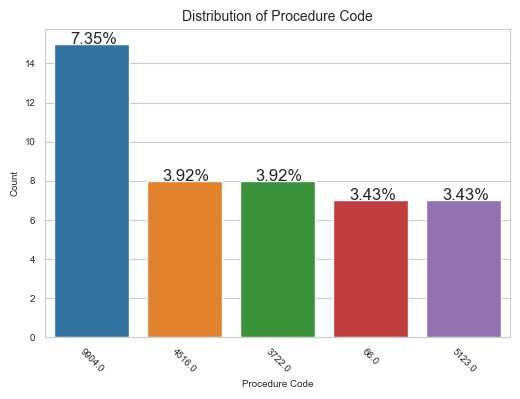

In [73]:
# Plot the countplot for claim precedure codes (Top 5)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(5).index)
plt.title('Distribution of Procedure Code', fontsize=10)
plt.xlabel('Procedure Code', size = 7)
plt.ylabel('Count', size = 7)
plt.xticks(rotation=-45)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, ClmProcedureCode_OP_df['ProcedureCode'], 0.02, 0.01, 12)

In [74]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_Inpatient['Inpatient_or_Outpatient'] = 1
Train_Outpatient['Inpatient_or_Outpatient'] = 0
Test_Inpatient['Inpatient_or_Outpatient'] = 1
Test_Outpatient['Inpatient_or_Outpatient'] = 0

In [75]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_Outpatient.columns if idx in Train_Inpatient.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient, Train_Outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')


['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [76]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train , how = 'inner', on = 'Provider' )


In [77]:
# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in Test_Outpatient.columns if idx in Test_Inpatient.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(Test_Inpatient, Test_Outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, Test_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, Test , how = 'inner', on = 'Provider' )


In [78]:
Final_Dataset_Train.shape

(558211, 72)

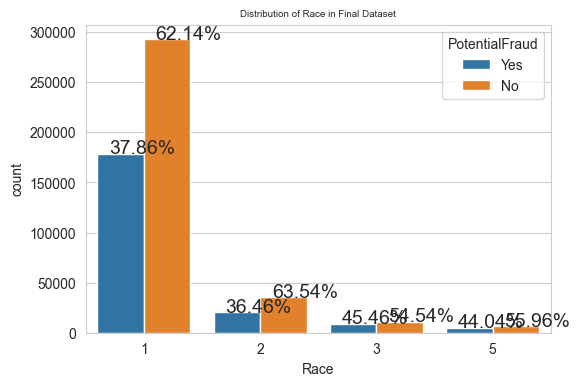

In [79]:
# Distribution of race in Overall data
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Race',y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Final_Dataset_Train['Race'].value_counts().index)
plt.title('Distribution of Race in Final Dataset', size = 7)
percentage_with_hue(ax, Final_Dataset_Train.Race, 4,2,-0.1,200, 14)

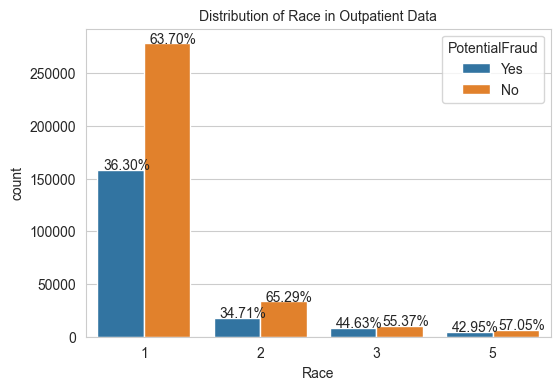

In [83]:
 #Distribution of race in Outnpatient Data
plt.figure(figsize=(6, 4))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 0]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Outpatient Data', size = 10)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,200, 10)

In [84]:
#Calculatinng total and percentage money lost for Inpatient
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_Money_Fraud_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].sum()
print("Total_Money_Spent_Inpatient : ",Total_Money_Spent_Inpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Inpatient/Total_number_of_inpatient_claims))
print("Total_Money_Fraud_Inpatient : ",Total_Money_Fraud_Inpatient)
print("Percentage of money spent in fraud for Inpatient = {:.2f}%".format(Total_Money_Fraud_Inpatient/Total_Money_Spent_Inpatient *100))


Total_Money_Spent_Inpatient :  408297020
Average reimbursed amount per patient : 10088
Total_Money_Fraud_Inpatient :  241288510
Percentage of money spent in fraud for Inpatient = 59.10%


In [85]:
#Calculatinng total and percentage money lost for Outpatient
Total_number_of_Outpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].count()
Total_Money_Fraud_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].sum()
print("Total_Money_Spent_Outpatient : ",Total_Money_Spent_Outpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Outpatient/Total_number_of_Outpatient_claims))
print("Total_Money_Fraud_Outpatient : ",Total_Money_Fraud_Outpatient)
print("Percentage of money spent in fraud for Outpatient = {:.2f}%".format(Total_Money_Fraud_Outpatient/Total_Money_Spent_Outpatient *100))


Total_Money_Spent_Outpatient :  148246120
Average reimbursed amount per patient : 286
Total_Money_Fraud_Outpatient :  54392610
Percentage of money spent in fraud for Outpatient = 36.69%


In [86]:
#Calculatinng total and percentage money lost for overall data
Total_Money_Fraud = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent = Final_Dataset_Train.InscClaimAmtReimbursed.sum()
print("Total_Money_Spent : ",Total_Money_Spent)
print("Total_Money_Fraud : ",Total_Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Total_Money_Fraud/Total_Money_Spent *100))

Total_Money_Spent :  556543140
Total_Money_Fraud :  295681120
Percentage of money spent in fraud = 53.13%


In [97]:
# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']
#

In [98]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [99]:
len(Final_Dataset_Train.columns)

74

In [100]:
len(Final_Dataset_Test.columns)

73

# Missing value imputations

In [101]:
# find the columns which contain null values
Final_Dataset_Train.columns[Final_Dataset_Train.isnull().any()].tolist()

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month',
 'DOD']

In [102]:
## Fill missing results using 0
Final_Dataset_Train = Final_Dataset_Train.fillna(0).copy()
Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

In [103]:
Final_Dataset_Train.isna().sum().sum()

0

In [104]:
Final_Dataset_Test.isna().sum().sum()

0

# Feature Engineering

In [105]:
def create_feature_using_groupby(Train_df, Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''
    
    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        print(new_col_name)
        Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Train_df, Test_df

In [106]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test = create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], columns, 'mean')


PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_Patient_Age
PerProvider_mean_NoOfMonths_PartACov
PerProvider_mean_NoOfMonths_PartBCov
PerProvider_mean_Hospitalization_Duration
PerProvider_mean_Claim_Period
PerProvider_mean_Patient_Risk_Score


In [107]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['BeneID'], columns, 'mean')


PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Patient_Age
PerBeneID_mean_Hospitalization_Duration
PerBeneID_mean_Claim_Period
PerBeneID_mean_Patient_Risk_Score


In [109]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['AttendingPhysician'], columns, 'mean')



PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbursementAmt
PerAttendingPhysician_mean_OPAnnualDeductibleAmt
PerAttendingPhysician_mean_Patient_Age
PerAttendingPhysician_mean_Hospitalization_Duration
PerAttendingPhysician_mean_Claim_Period
PerAttendingPhysician_mean_Patient_Risk_Score


In [110]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OperatingPhysician'], columns, 'mean')


PerOperatingPhysician_mean_InscClaimAmtReimbursed
PerOperatingPhysician_mean_DeductibleAmtPaid
PerOperatingPhysician_mean_IPAnnualReimbursementAmt
PerOperatingPhysician_mean_IPAnnualDeductibleAmt
PerOperatingPhysician_mean_OPAnnualReimbursementAmt
PerOperatingPhysician_mean_OPAnnualDeductibleAmt
PerOperatingPhysician_mean_Patient_Age
PerOperatingPhysician_mean_Hospitalization_Duration
PerOperatingPhysician_mean_Claim_Period
PerOperatingPhysician_mean_Patient_Risk_Score


In [111]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OtherPhysician'], columns, 'mean')


PerOtherPhysician_mean_InscClaimAmtReimbursed
PerOtherPhysician_mean_DeductibleAmtPaid
PerOtherPhysician_mean_IPAnnualReimbursementAmt
PerOtherPhysician_mean_IPAnnualDeductibleAmt
PerOtherPhysician_mean_OPAnnualReimbursementAmt
PerOtherPhysician_mean_OPAnnualDeductibleAmt
PerOtherPhysician_mean_Patient_Age
PerOtherPhysician_mean_Hospitalization_Duration
PerOtherPhysician_mean_Claim_Period
PerOtherPhysician_mean_Patient_Risk_Score


In [112]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['DiagnosisGroupCode'], columns, 'mean')


PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed
PerDiagnosisGroupCode_mean_DeductibleAmtPaid
PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_Patient_Age
PerDiagnosisGroupCode_mean_Hospitalization_Duration
PerDiagnosisGroupCode_mean_Claim_Period
PerDiagnosisGroupCode_mean_Patient_Risk_Score


In [113]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmAdmitDiagnosisCode'], columns, 'mean')

PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed
PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid
PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_Patient_Age
PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration
PerClmAdmitDiagnosisCode_mean_Claim_Period
PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score


In [114]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_1'], columns, 'mean')


PerClmProcedureCode_1_mean_InscClaimAmtReimbursed
PerClmProcedureCode_1_mean_DeductibleAmtPaid
PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_Patient_Age
PerClmProcedureCode_1_mean_Hospitalization_Duration
PerClmProcedureCode_1_mean_Claim_Period
PerClmProcedureCode_1_mean_Patient_Risk_Score


In [115]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_2'], columns, 'mean')


PerClmProcedureCode_2_mean_InscClaimAmtReimbursed
PerClmProcedureCode_2_mean_DeductibleAmtPaid
PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_Patient_Age
PerClmProcedureCode_2_mean_Hospitalization_Duration
PerClmProcedureCode_2_mean_Claim_Period
PerClmProcedureCode_2_mean_Patient_Risk_Score


In [116]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_3'], columns, 'mean')


PerClmProcedureCode_3_mean_InscClaimAmtReimbursed
PerClmProcedureCode_3_mean_DeductibleAmtPaid
PerClmProcedureCode_3_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_Patient_Age
PerClmProcedureCode_3_mean_Hospitalization_Duration
PerClmProcedureCode_3_mean_Claim_Period
PerClmProcedureCode_3_mean_Patient_Risk_Score


In [117]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_4'], columns, 'mean')


PerClmProcedureCode_4_mean_InscClaimAmtReimbursed
PerClmProcedureCode_4_mean_DeductibleAmtPaid
PerClmProcedureCode_4_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_Patient_Age
PerClmProcedureCode_4_mean_Hospitalization_Duration
PerClmProcedureCode_4_mean_Claim_Period
PerClmProcedureCode_4_mean_Patient_Risk_Score


In [118]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_5'], columns, 'mean')


PerClmProcedureCode_5_mean_InscClaimAmtReimbursed
PerClmProcedureCode_5_mean_DeductibleAmtPaid
PerClmProcedureCode_5_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_Patient_Age
PerClmProcedureCode_5_mean_Hospitalization_Duration
PerClmProcedureCode_5_mean_Claim_Period
PerClmProcedureCode_5_mean_Patient_Risk_Score


In [119]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_6'], columns, 'mean')

PerClmProcedureCode_6_mean_InscClaimAmtReimbursed
PerClmProcedureCode_6_mean_DeductibleAmtPaid
PerClmProcedureCode_6_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_Patient_Age
PerClmProcedureCode_6_mean_Hospitalization_Duration
PerClmProcedureCode_6_mean_Claim_Period
PerClmProcedureCode_6_mean_Patient_Risk_Score


In [120]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_1'], columns, 'mean')


PerClmDiagnosisCode_1_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_1_mean_DeductibleAmtPaid
PerClmDiagnosisCode_1_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_Patient_Age
PerClmDiagnosisCode_1_mean_Hospitalization_Duration
PerClmDiagnosisCode_1_mean_Claim_Period
PerClmDiagnosisCode_1_mean_Patient_Risk_Score


In [121]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_2'], columns, 'mean')


PerClmDiagnosisCode_2_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_2_mean_DeductibleAmtPaid
PerClmDiagnosisCode_2_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_Patient_Age
PerClmDiagnosisCode_2_mean_Hospitalization_Duration
PerClmDiagnosisCode_2_mean_Claim_Period
PerClmDiagnosisCode_2_mean_Patient_Risk_Score


In [122]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_3'], columns, 'mean')


PerClmDiagnosisCode_3_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_3_mean_DeductibleAmtPaid
PerClmDiagnosisCode_3_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_3_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_3_mean_Patient_Age
PerClmDiagnosisCode_3_mean_Hospitalization_Duration
PerClmDiagnosisCode_3_mean_Claim_Period
PerClmDiagnosisCode_3_mean_Patient_Risk_Score


In [123]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_4'], columns, 'mean')


PerClmDiagnosisCode_4_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_4_mean_DeductibleAmtPaid
PerClmDiagnosisCode_4_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_4_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_4_mean_Patient_Age
PerClmDiagnosisCode_4_mean_Hospitalization_Duration
PerClmDiagnosisCode_4_mean_Claim_Period
PerClmDiagnosisCode_4_mean_Patient_Risk_Score


In [124]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_5'], columns, 'mean')


PerClmDiagnosisCode_5_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_5_mean_DeductibleAmtPaid
PerClmDiagnosisCode_5_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_5_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_5_mean_Patient_Age
PerClmDiagnosisCode_5_mean_Hospitalization_Duration
PerClmDiagnosisCode_5_mean_Claim_Period
PerClmDiagnosisCode_5_mean_Patient_Risk_Score


In [125]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_6'], columns, 'mean')


PerClmDiagnosisCode_6_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_6_mean_DeductibleAmtPaid
PerClmDiagnosisCode_6_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_6_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_6_mean_Patient_Age
PerClmDiagnosisCode_6_mean_Hospitalization_Duration
PerClmDiagnosisCode_6_mean_Claim_Period
PerClmDiagnosisCode_6_mean_Patient_Risk_Score


In [127]:
# Count the claims per provider
Final_Dataset_Train, Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], ['ClaimID'], 'count')

PerProvider_count_ClaimID


In [128]:
columns = ['ClaimID']
grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
               'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
               'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
for ele in grp_by_cols:
    lst = ['Provider', ele]
    Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, lst, columns, 'count')


PerProviderBeneID_count_ClaimID
PerProviderAttendingPhysician_count_ClaimID
PerProviderOtherPhysician_count_ClaimID
PerProviderOperatingPhysician_count_ClaimID
PerProviderClmAdmitDiagnosisCode_count_ClaimID
PerProviderClmProcedureCode_1_count_ClaimID
PerProviderClmProcedureCode_2_count_ClaimID
PerProviderClmProcedureCode_3_count_ClaimID
PerProviderClmProcedureCode_4_count_ClaimID
PerProviderClmProcedureCode_5_count_ClaimID
PerProviderClmDiagnosisCode_1_count_ClaimID
PerProviderClmDiagnosisCode_2_count_ClaimID
PerProviderClmDiagnosisCode_3_count_ClaimID
PerProviderClmDiagnosisCode_4_count_ClaimID
PerProviderClmDiagnosisCode_5_count_ClaimID
PerProviderClmDiagnosisCode_6_count_ClaimID
PerProviderDiagnosisGroupCode_count_ClaimID


In [129]:
Final_Dataset_Train.shape

(558211, 284)

In [130]:
Final_Dataset_Test.shape

(135392, 283)

In [131]:
for col in Final_Dataset_Train.columns:
    if col not in Final_Dataset_Test.columns:
        print(col)

PotentialFraud


In [132]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']

Final_Dataset_Train_FE=Final_Dataset_Train.drop(columns=remove_columns, axis=1)
Final_Dataset_Test_FE=Final_Dataset_Test.drop(columns=remove_columns, axis=1)

In [133]:
# Convert type of Gender and Race to categorical feature
Final_Dataset_Train_FE.Gender=Final_Dataset_Train_FE.Gender.astype('category')
Final_Dataset_Test_FE.Gender=Final_Dataset_Test_FE.Gender.astype('category')

Final_Dataset_Train_FE.Race=Final_Dataset_Train_FE.Race.astype('category')
Final_Dataset_Test_FE.Race=Final_Dataset_Test_FE.Race.astype('category')

In [134]:
# Do one hot encoding for gender and Race
Final_Dataset_Train_FE=pd.get_dummies(Final_Dataset_Train_FE,columns=['Gender','Race'])
Final_Dataset_Test_FE=pd.get_dummies(Final_Dataset_Test_FE,columns=['Gender','Race'])

Now group by Provider and take sum to create feature corresponding to each provider

In [135]:
Final_Dataset_Provider_Train = Final_Dataset_Train_FE.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Final_Dataset_Provider_Test  = Final_Dataset_Test_FE.groupby(['Provider'],as_index=False).agg('sum')


In [136]:
Final_Dataset_Provider_Train.shape

(5410, 247)

In [137]:
Final_Dataset_Provider_Test.shape

(1353, 246)

In [138]:
Final_Dataset_Provider_Train.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Final_Dataset_Provider_Train.PotentialFraud=Final_Dataset_Provider_Train.PotentialFraud.astype('int64')

In [140]:
Final_Dataset_Provider_Train.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnual

In [141]:
Final_Dataset_Provider_Test.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,P

In [142]:
Final_Dataset_Provider_Train.to_csv('Final_Train.csv')
Final_Dataset_Provider_Test.to_csv('Final_Test.csv')